In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

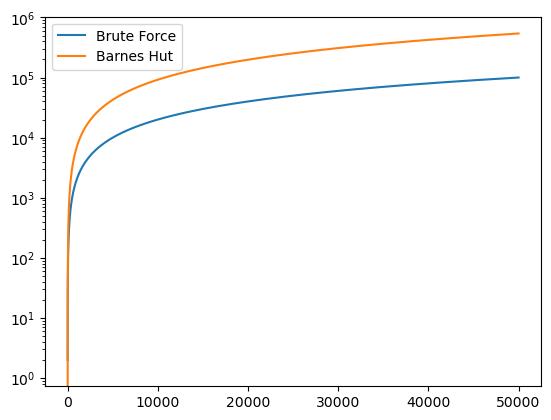

In [2]:
# Create a vector from 1 to 50000
x = np.arange(1, 50000 + 1)
y_bf = x*2
y_hu = x * np.log(x)

# Plot the data using matplotlib
plt.plot(x, y_bf, label='Brute Force')
plt.plot(x, y_hu, label='Barnes Hut')
# log scale y
plt.yscale('log')
plt.legend()
plt.show()

In [3]:
no_opt = pd.DataFrame(columns=['compute_force_particle', 'compute_force', 'insert_particle', 'max', 'move_all_particles', 'move_particle', 'compute_bh_force', 'get_octrant', 'clean_tree'],
                      index = [10000, 32768, 40000, 140005])

no_opt.loc[10000] = [55.68, 19.92, 16.86, 3.07, 3.07, 1.02, 0, 0, 0]
no_opt.loc[40000] = [58.24, 20.88, 7.00, 2.33, 2.08, 2.33, 2.20, 1.17, 1.69]
no_opt.loc[32768] = [54.02, 20.89, 11.29, 3.11, 0.66, 1.98, 1.79, 2.63, 1.04]
no_opt.loc[140005] = [59.36, 20.10, 9.58, 3.01, 1.21, 1.26, 2.30, 0.95, 0.83]

In [4]:
no_opt

,compute_force_particle,compute_force,insert_particle,max,move_all_particles,move_particle,compute_bh_force,get_octrant,clean_tree
10000,55.68,19.92,16.86,3.07,3.07,1.02,0,0,0
32768,54.02,20.89,11.29,3.11,0.66,1.98,1.79,2.63,1.04
40000,58.24,20.88,7.0,2.33,2.08,2.33,2.2,1.17,1.69
140005,59.36,20.1,9.58,3.01,1.21,1.26,2.3,0.95,0.83


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


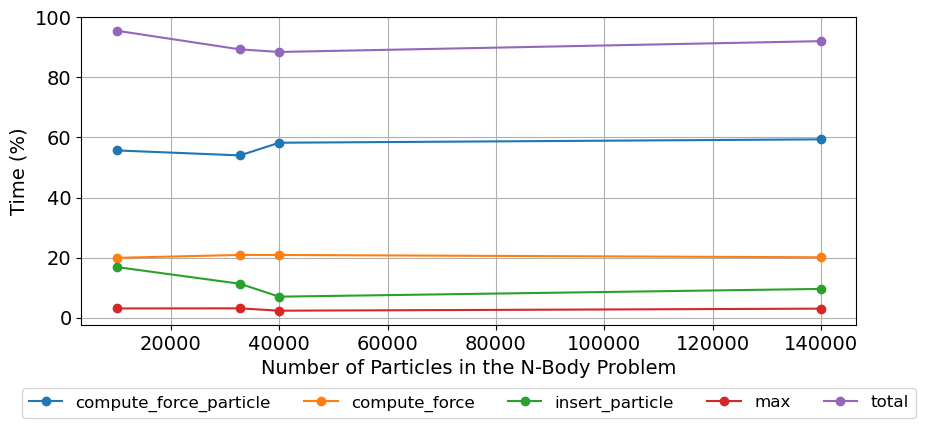

In [5]:
plt.figure(figsize=(10, 4))
for col in no_opt.columns[:4]:
    plt.plot(no_opt.index, no_opt[col].values, marker='o', linestyle='-', label=col)
plt.plot(no_opt.index, no_opt.iloc[:, :4].sum(axis=1).values, marker='o', linestyle='-', label='total')
plt.xlabel('Number of Particles in the N-Body Problem', fontsize=14)
plt.ylabel('Time (%)', fontsize=14)
plt.xticks(fontsize=14)  # Adjust the fontsize of x-axis tick labels
plt.yticks(fontsize=14)  # Adjust the fontsize of y-axis tick labels
plt.grid(True)

# Put the legend at the right, outside the plot
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.33), ncol=5, fontsize=12)
plt.savefig('performance_metrics.eps', format='eps', bbox_inches='tight')

plt.show()

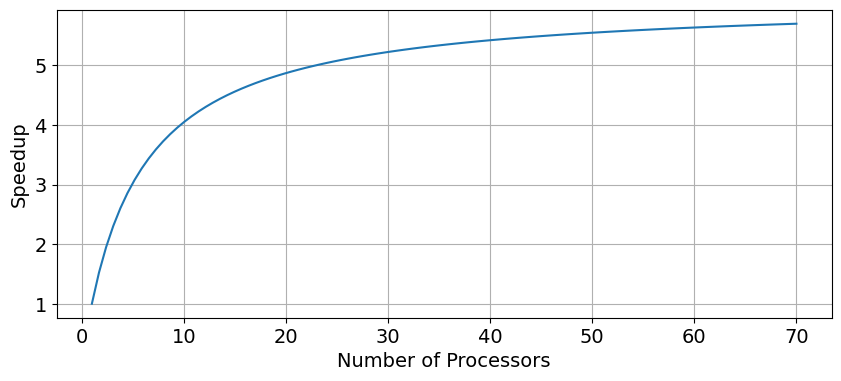

In [6]:
x_vals = np.linspace(1, 70, 100)
p = 0.8365
speedup = 1 / ((1 - p) + p / x_vals)

plt.figure(figsize=(10, 4))
plt.plot(x_vals, speedup, linestyle='-', label='Speedup')
plt.xlabel('Number of Processors', fontsize=14)
plt.ylabel('Speedup', fontsize=14)
plt.xticks(fontsize=14)  # Adjust the fontsize of x-axis tick labels
plt.yticks(fontsize=14)  # Adjust the fontsize of y-axis tick labels
plt.grid(True)

#save figure
plt.savefig('speedup.eps', format='eps', bbox_inches='tight')
plt.show()

# Create Data with other sizes

In [7]:
# Path to the file
file_path = '../examples/cluster_LI.txt'
size = 10000

for size in np.linspace(10000, 140000, 14, dtype=int):
    data = []
    # Open the file and read line by line
    with open(file_path, 'r') as file:
        # Read the first line which contains the number of data lines
        num_lines = int(file.readline().strip())

        # Loop through the remaining lines
        for line in file:
            # Split each line by tab and convert each part to the appropriate type
            parts = line.strip().split('\t')
            data_row = [float(part) for part in parts]
            data.append(data_row)

    # Choose a subset of 10000 of the data points
    data_10k = data[:size]

    # Path for the new file to export the subset
    new_file_path = f'../examples/strong_scaling/subset_{size}.txt'

    # Write the subset of data to the new file
    with open(new_file_path, 'w') as new_file:
        # Write the number of data lines
        new_file.write(str(len(data_10k)) + '\n')

        # Write each data point
        for data_row in data_10k:
            line = '\t'.join(map(str, data_row))
            new_file.write(line + '\n')

In [8]:
# Re-creating the data processing and exporting steps, as the previous execution environment seems to have been reset.

# Since the original data is not available in this environment, I will simulate a similar dataset for demonstration.

import random

# Simulating a dataset similar to the described format
def simulate_data(num_rows, num_columns):
    return [[random.uniform(0, 1) for _ in range(num_columns)] for _ in range(num_rows)]

# Simulate the original data (assuming 50000 rows and 3 columns as an example)
original_data = simulate_data(50000, 3)

# Selecting the first 10000 data points
data_10k = original_data[:10000]

# Path for the new file to export the subset
new_file_path = 'cluster_LI_subset.txt'

# Write the subset of data to the new file
with open(new_file_path, 'w') as new_file:
    # Write the number of data lines
    new_file.write(str(len(data_10k)) + '\n')

    # Write each data point
    for data_row in data_10k:
        line = '\t'.join(map(str, data_row))
        new_file.write(line + '\n')

new_file_path


'cluster_LI_subset.txt'

# Runs

## MPI, -O3

In [9]:
mpi_o3_dict = {
    "10k": [1.140705, 0.736148, 0.543674, 0.514461, 0.500602, 1.162728],
    "20k": [2.131084, 1.352766, 1.092217, 1.030349, 0.878009, 1.531590],
    "30k": [4.792923, 2.924593, 2.096649, 2.001034, 1.628995, 2.117418],
    "40k": [6.892599, 4.232574, 2.952995, 2.677812, 2.222199, 2.658914],
    "50k": [9.201588, 5.607243, 4.154891, 3.427172, 2.956818, 3.170248],
    "60k": [12.544351, 7.560054, 5.297552, 4.468853, 4.161119, 3.974918],
    "70k": [14.710458, 9.029194, 6.306499, 5.140971, 4.303335, 4.562187],
    "80k": [17.370091, 10.406924, 7.478995, 6.100355, 5.651027, 5.332630],
    "90k": [21.384089, 12.967300, 9.080872, 7.196291, 6.673849, 6.038615],
    "100k": [22.658377, 13.757911, 9.884316, 7.787097, 7.224180, 6.719790],
    "110k": [26.534488, 16.072475, 11.248630, 9.021860, 8.096682, 7.565473],
    "120k": [29.284242, 17.899288, 12.391254, 9.849264, 8.922347, 8.336660],
    "130k": [32.487730, 19.955686, 13.529508, 10.881848, 9.193547, 9.286968],
    "140k": [37.317545, 22.544607, 15.361248, 11.963624, 10.191396, 9.881553]
}

# Convert the dictionary to a DataFrame
mpi_o3 = pd.DataFrame.from_dict(mpi_o3_dict, orient='index', columns=[1, 2, 4, 8, 16, 32])
mpi_o3.index.name = 'Particles'
mpi_o3.columns.name = 'Processes'
mpi_o3_speedup = mpi_o3.copy().div(mpi_o3[1], axis=0)
mpi_o3_speedup = mpi_o3_speedup.apply(lambda x: 1 / x).T
mpi_o3_speedup

Particles,10k,20k,30k,40k,50k,60k,70k,80k,90k,100k,110k,120k,130k,140k
Processes,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.549559,1.575353,1.638834,1.628465,1.641018,1.659294,1.629211,1.669090,1.649078,1.646934,1.650927,1.636056,1.627994,1.655276
4,2.098142,1.951154,2.285992,2.334105,2.214640,2.367952,2.332587,2.322517,2.354850,2.292357,2.358908,2.363299,2.401250,2.429330
8,2.217282,2.068313,2.395223,2.573967,2.684892,2.807063,2.861416,2.847390,2.971543,2.909733,2.941133,2.973242,2.985498,3.119251
16,2.278666,2.427178,2.942258,3.101702,3.111990,3.014658,3.418386,3.073794,3.204161,3.136464,3.277205,3.282123,3.533754,3.661672
32,0.981059,1.391419,2.263570,2.592261,2.902482,3.155877,3.224431,3.257322,3.541224,3.371888,3.507314,3.512707,3.498206,3.776486


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


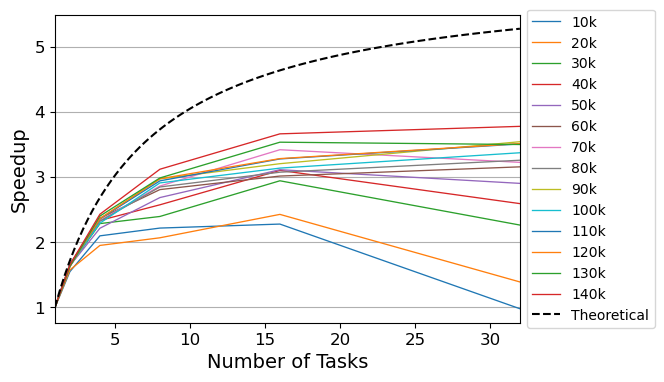

In [10]:
# Create the plot
fig, ax = plt.subplots(figsize=(6, 4))
mpi_o3_speedup.plot(ax=ax, linewidth=0.95)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xlabel("Number of Tasks", fontsize=14)
ax.set_ylabel("Speedup", fontsize=14)

# Add a dashed gray line with slope 1 (y=x)
x = np.linspace(1, 32, 100)
# ax.plot(x, x, '--', color='gray', label='Perfect')
ax.plot(x, 1/((1-0.8365) + 0.8365/x), '--', color='black', label='Theoretical')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xlim([1,32])
# ax.set_ylim([1,3])
ax.yaxis.grid(True)
ax.tick_params(axis='both', labelsize=12)  # Adjust the labelsize as needed

plt.savefig('o3_all.eps', format='eps', bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


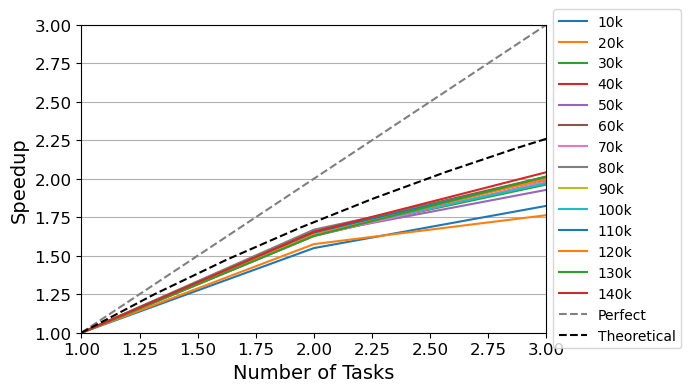

In [11]:
# Create the plot
fig, ax = plt.subplots(figsize=(6, 4))
mpi_o3_speedup.plot(ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xlabel("Number of Tasks", fontsize=14)
ax.set_ylabel("Speedup", fontsize=14)

# Add a dashed gray line with slope 1 (y=x)
x = np.linspace(1, 32, 100)
ax.plot(x, x, '--', color='gray', label='Perfect')
ax.plot(x, 1/((1-0.8365) + 0.8365/x), '--', color='black', label='Theoretical')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xlim([1,3])
ax.set_ylim([1,3])
ax.yaxis.grid(True)
ax.tick_params(axis='both', labelsize=12)  # Adjust the labelsize as needed

plt.savefig('o3_short.eps', format='eps', bbox_inches='tight')
plt.show()

## MPI, -O0

In [12]:
mpi_o0_dict = {
    "10k": [2.440508, 1.457330, 1.004053, 0.836443, 0.763803, 1.438001],
    "20k": [4.425553, 2.721560, 2.016156, 1.655901, 1.514027, 2.033383],
    "30k": [9.734754, 5.714876, 3.898541, 3.095662, 2.732863, 2.920263],
    "40k": [13.741398, 8.122838, 5.608799, 4.304246, 3.613256, 3.924809],
    "50k": [18.180976, 10.897744, 7.140415, 5.635152, 4.664665, 4.823796],
    "60k": [24.507483, 13.948247, 9.222196, 7.204714, 6.310927, 6.072712],
    "70k": [28.366305, 16.947739, 11.070550, 8.509021, 7.506198, 6.912896],
    "80k": [33.214550, 19.521199, 13.159277, 10.205334, 8.675838, 8.020576],
    "90k": [41.153194, 24.171385, 15.986310, 11.928477, 9.759346, 9.449830],
    "100k": [43.032910, 25.301814, 16.927332, 12.932512, 10.859242, 10.437451],
    "100k": [50.317151, 29.644160, 19.644120, 14.968594, 12.347764, 11.720617],
    "120k": [54.902252, 32.216755, 21.591240, 16.367586, 13.391149, 12.810418],
    "130k": [61.618703, 35.347057, 23.460454, 17.806646, 15.057148, 14.249481],
    "140k": [72.209879, 40.965371, 26.860517, 19.912101, 16.762162, 15.524172]
}

# Convert the dictionary to a DataFrame
mpi_o0 = pd.DataFrame.from_dict(mpi_o0_dict, orient='index', columns=[1, 2, 4, 8, 16, 32])
mpi_o0.index.name = 'Particles'
mpi_o0.columns.name = 'Processes'
mpi_o0_speedup = mpi_o0.copy().div(mpi_o0[1], axis=0)
mpi_o0_speedup = mpi_o0_speedup.apply(lambda x: 1 / x).T
mpi_o0_speedup

Particles,10k,20k,30k,40k,50k,60k,70k,80k,90k,100k,120k,130k,140k
Processes,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.674643,1.626109,1.703406,1.691699,1.668325,1.757030,1.673752,1.701461,1.702558,1.697371,1.704152,1.743248,1.762705
4,2.430657,2.195045,2.497025,2.449972,2.546207,2.657445,2.562321,2.524041,2.574277,2.561436,2.542802,2.626492,2.688328
8,2.917722,2.672595,3.144644,3.192522,3.226351,3.401590,3.333674,3.254626,3.449996,3.361515,3.354328,3.460433,3.626432
16,3.195206,2.923034,3.562108,3.803051,3.897595,3.883341,3.779051,3.828397,4.216798,4.075001,4.099891,4.092322,4.307910
32,1.697153,2.176448,3.333520,3.501163,3.769018,4.035674,4.103390,4.141168,4.354914,4.293046,4.285750,4.324277,4.651448


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


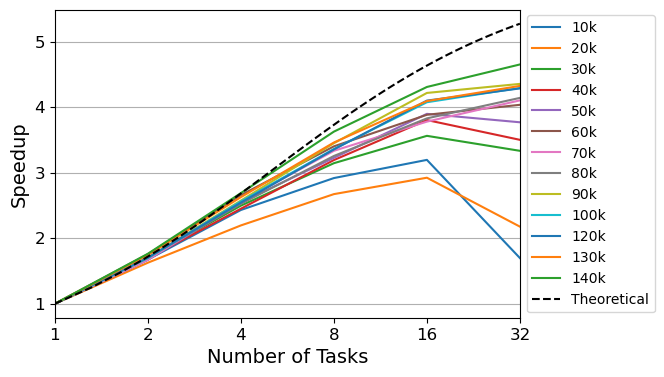

In [13]:
# Sample data (replace with your actual data)
x = np.linspace(1, 32, 100)
y = 1/((1-0.8365) + 0.8365/x)

# Create the plot
fig, ax = plt.subplots(figsize=(6, 4))

# Plot mpi_o0_speedup data (replace with your actual data)
mpi_o0_speedup.plot(ax=ax, label='MPI O0 Speedup')

# Add the theoretical line
ax.plot(x, y, '--', color='black', label='Theoretical')

ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xlabel("Number of Tasks", fontsize=14)
ax.set_ylabel("Speedup", fontsize=14)

# Set the x-axis to a log2 scale
ax.set_xscale('log', base=2)

# Manually set the x-axis ticks
ax.set_xticks([1, 2, 4, 8, 16, 32])

# Set the x-axis tick labels
ax.set_xticklabels([1, 2, 4, 8, 16, 32])

ax.set_xlim([1, 32])
ax.yaxis.grid(True)
ax.tick_params(axis='both', labelsize=12)

plt.savefig('o0_all.eps', format='eps', bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


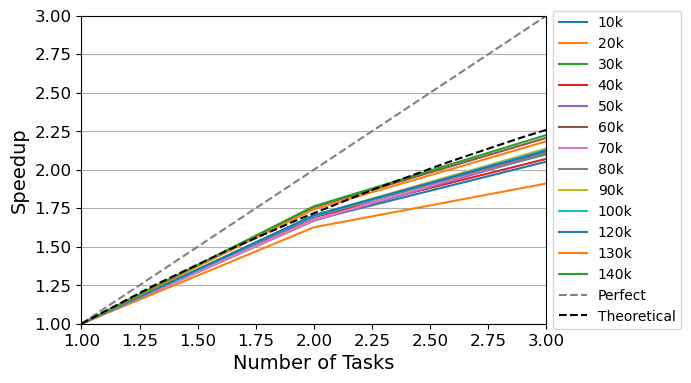

In [14]:
# Create the plot
fig, ax = plt.subplots(figsize=(6, 4))
mpi_o0_speedup.plot(ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xlabel("Number of Tasks", fontsize=14)
ax.set_ylabel("Speedup", fontsize=14)

# Add a dashed gray line with slope 1 (y=x)
x = np.linspace(1, 32, 100)
ax.plot(x, x, '--', color='gray', label='Perfect')
ax.plot(x, 1/((1-0.8365) + 0.8365/x), '--', color='black', label='Theoretical')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xlim([1,3])
ax.set_ylim([1,3])
ax.yaxis.grid(True)
ax.tick_params(axis='both', labelsize=12)  # Adjust the labelsize as needed

plt.savefig('o0_short.eps', format='eps', bbox_inches='tight')
plt.show()

In [15]:
mpi_o3_eff = mpi_o3_speedup.copy().div(mpi_o3_speedup.index, axis=0)
mpi_o0_eff = mpi_o0_speedup.copy().div(mpi_o0_speedup.index, axis=0)
mpi_o3_eff

Particles,10k,20k,30k,40k,50k,60k,70k,80k,90k,100k,110k,120k,130k,140k
Processes,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0.774780,0.787677,0.819417,0.814233,0.820509,0.829647,0.814605,0.834545,0.824539,0.823467,0.825464,0.818028,0.813997,0.827638
4,0.524535,0.487789,0.571498,0.583526,0.553660,0.591988,0.583147,0.580629,0.588712,0.573089,0.589727,0.590825,0.600312,0.607333
8,0.277160,0.258539,0.299403,0.321746,0.335612,0.350883,0.357677,0.355924,0.371443,0.363717,0.367642,0.371655,0.373187,0.389906
16,0.142417,0.151699,0.183891,0.193856,0.194499,0.188416,0.213649,0.192112,0.200260,0.196029,0.204825,0.205133,0.220860,0.228854
32,0.030658,0.043482,0.070737,0.081008,0.090703,0.098621,0.100763,0.101791,0.110663,0.105371,0.109604,0.109772,0.109319,0.118015


In [16]:
mpi_eff_tasks = pd.DataFrame(index = [1,2,4,8])
mpi_eff_tasks['-O0: 10k per task'] = [1.000000, 0.813054, 0.612493, 0.406828]
mpi_eff_tasks['-O3: 10k per task'] = [1.000000, 0.787677, 0.583526, 0.355924]
#mpi_o0_eff_tasks['20k per task'] = [1.000000, 0.845850, 0.631010, np.nan, np.nan, np.nan]
#mpi_o0_eff_tasks['30k per task'] = [1.000000, 0.878515, 0.635701, np.nan, np.nan, np.nan]
mpi_eff_tasks

,-O0: 10k per task,-O3: 10k per task
1,1.000000,1.000000
2,0.813054,0.787677
4,0.612493,0.583526
8,0.406828,0.355924


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


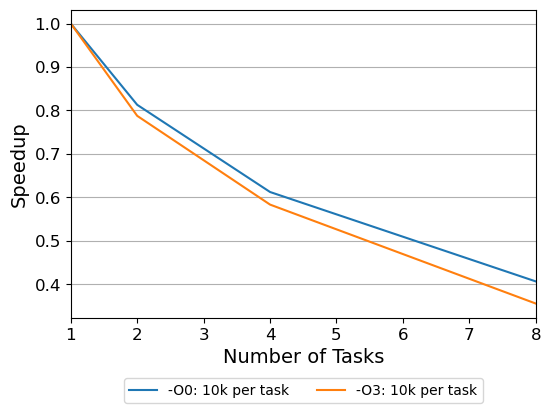

In [17]:
# Create the plot
fig, ax = plt.subplots(figsize=(6, 4))
mpi_eff_tasks.plot(ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xlabel("Number of Tasks", fontsize=14)
ax.set_ylabel("Speedup", fontsize=14)

# Add a dashed gray line with slope 1 (y=x)
x = np.linspace(1, 8, 100)
# ax.plot(x, x, '--', color='gray', label='Perfect')
#ax.plot(x, 1/((1-0.8365) + 0.8365/x), '--', color='black', label='Theoretical')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)
ax.set_xlim([1,8])
# ax.set_ylim([1,3])
ax.yaxis.grid(True)
ax.tick_params(axis='both', labelsize=12)  # Adjust the labelsize as needed

plt.savefig('mpi_eff.eps', format='eps', bbox_inches='tight')
plt.show()

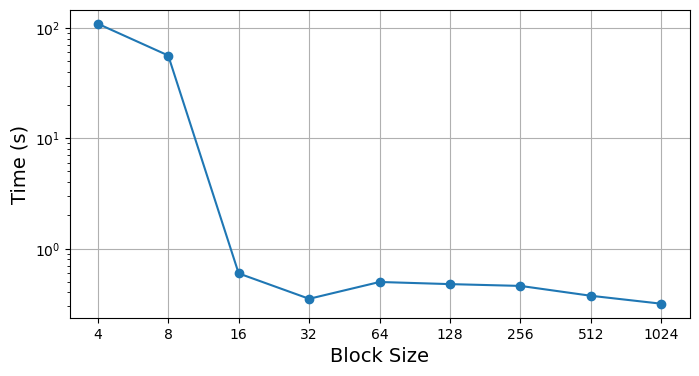

In [32]:
# Data
block_sizes = [4, 8, 16, 32, 64, 128, 256, 512, 1024]
times = [108.998758, 56.16171, 0.595583, 0.350667, 0.498138, 0.476348, 0.458807, 0.373469, 0.316455]

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(block_sizes, times, marker='o')
plt.xlabel('Block Size', fontsize=14)
plt.ylabel('Time (s)', fontsize=14)
plt.grid(True)
plt.xscale('log', base=2)
plt.xticks(block_sizes, labels=[str(size) for size in block_sizes])

plt.yscale('log')
ax.tick_params(axis='both', labelsize=12)

plt.savefig('block_size.eps', format='eps', bbox_inches='tight')
plt.show()